---
# Documentation: https://wowchemy.com/docs/managing-content/

title: "K Means Implementation and Evaluation"
summary: ""
authors: []
tags: []
categories: []
date: 2022-05-24T14:48:04+08:00

# Optional external URL for project (replaces project detail page).
external_link: ""

# Featured image
# To use, add an image named `featured.jpg/png` to your page's folder.
# Focal points: Smart, Center, TopLeft, Top, TopRight, Left, Right, BottomLeft, Bottom, BottomRight.
image:
  caption: ""
  focal_point: ""
  preview_only: false

# Custom links (optional).
#   Uncomment and edit lines below to show custom links.
# links:
# - name: Follow
#   url: https://twitter.com
#   icon_pack: fab
#   icon: twitter

url_code: ""
url_pdf: ""
url_slides: ""
url_video: ""

# Slides (optional).
#   Associate this project with Markdown slides.
#   Simply enter your slide deck's filename without extension.
#   E.g. `slides = "example-slides"` references `content/slides/example-slides.md`.
#   Otherwise, set `slides = ""`.
slides: ""
---


## Implementation of K-Means Algorithms
- Algorithms
- Experiments
   1. loading iris dataset
   2. 
    

In [ ]:

def kmeans(X, k=3, measure='euc'):
    """
    """
    pass

def euclidean_distance():
    pass

### Experiment
1. load dataset
2. exploratory analysis

  a. visualizing features to explore the distribution(characteristic) of each dimension or the combination of several dimensions.
  
3. data preprocessing

  a. normaling the feature vectors
4. clustering
5. evaluation of clusters.

#### Step 1: load dataset

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [3]:
iris = datasets.load_iris()

In [4]:
print(type(iris))
print(iris.data.shape)
iris.feature_names

<class 'sklearn.utils.Bunch'>
(150, 4)


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
print(iris.target.shape)
iris.target_names

(150,)


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### Step 2: Exploratory analysis

In [6]:
X_featues = iris.data
Y_label = iris.target
Y_label_name = iris.target_names
X_feature_name = iris.feature_names

In [7]:
print("X features: ", X_featues.shape)
print("X features: ", X_featues[:,3].shape)
Y_label_id = np.unique(Y_label)
print("Y label id: ", Y_label_id)

X features:  (150, 4)
X features:  (150,)
Y label id:  [0 1 2]


In [8]:
# X_featues[idx, 0].squeeze()

##### Feature distribution: single dimension 

In [9]:
# def visualize_single_dimension(X, Y, label_ids, colors):
#     assert len(label_ids)==len(colors)
    
#     pass

[]

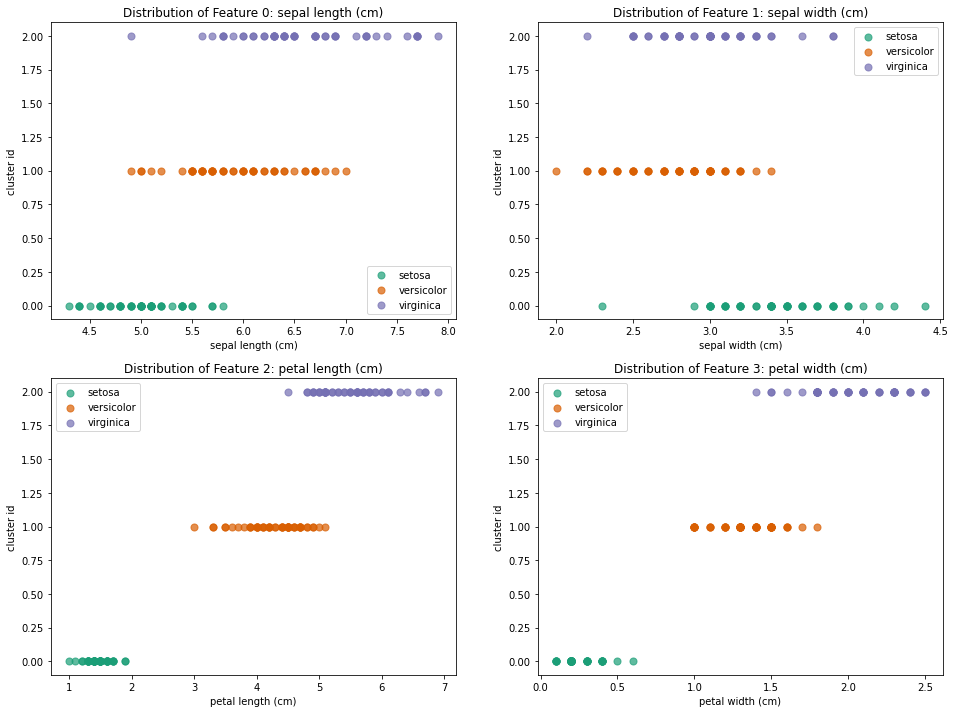

In [10]:
COLORS = ["#1B9E77", "#D95F02", "#7570B3"]
feature_id = 0
fig, ax = plt.subplots(2,2,figsize=(16,12))

## Plot 1
for label, color in zip(Y_label_id, COLORS):
    idx = np.where(Y_label==label)
    ax[0][0].scatter(X_featues[idx, feature_id].squeeze(),Y_label[idx],label=Y_label_name[label], color=color,s =50, alpha=0.7)
ax[0][0].set_xlabel(X_feature_name[feature_id])
ax[0][0].set_ylabel("cluster id")


ax[0][0].legend()
ax[0][0].set_title("Distribution of Feature {}: {}".format(feature_id, X_feature_name[feature_id]))
# ax[0][0].plot()

## Plot 2
feature_id = 1
# fig, ax = plt.subplots()
for label, color in zip(Y_label_id, COLORS):
    idx = np.where(Y_label==label)
    ax[0][1].scatter(X_featues[idx, feature_id].squeeze(),Y_label[idx],label=Y_label_name[label], color=color,s =50, alpha=0.7)
ax[0][1].set_xlabel(X_feature_name[feature_id])
ax[0][1].set_ylabel("cluster id")
ax[0][1].legend()
ax[0][1].set_title("Distribution of Feature {}: {}".format(feature_id, X_feature_name[feature_id]))

## Plot 3
feature_id = 2
for label, color in zip(Y_label_id, COLORS):
    idx = np.where(Y_label==label)
    ax[1][0].scatter(X_featues[idx, feature_id].squeeze(),Y_label[idx],label=Y_label_name[label], color=color,s =50, alpha=0.7)
ax[1][0].set_xlabel(X_feature_name[feature_id])
ax[1][0].set_ylabel("cluster id")
ax[1][0].legend()
ax[1][0].set_title("Distribution of Feature {}: {}".format(feature_id, X_feature_name[feature_id]))


## Plot 4
feature_id = 3
for label, color in zip(Y_label_id, COLORS):
    idx = np.where(Y_label==label)
    ax[1][1].scatter(X_featues[idx, feature_id].squeeze(),Y_label[idx],label=Y_label_name[label], color=color,s =50, alpha=0.7)
ax[1][1].set_xlabel(X_feature_name[feature_id])
ax[1][1].set_ylabel("cluster id")
ax[1][1].legend()
ax[1][1].set_title("Distribution of Feature {}: {}".format(feature_id, X_feature_name[feature_id]))


plt.savefig('vis_feature_1.png')
plt.plot()

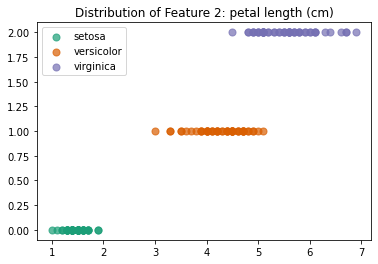

In [11]:
COLORS = ["#1B9E77", "#D95F02", "#7570B3"]
feature_id = 2
fig, ax = plt.subplots()
for label, color in zip(Y_label_id, COLORS):
    idx = np.where(Y_label==label)
    ax.scatter(X_featues[idx, feature_id].squeeze(),Y_label[idx],label=Y_label_name[label], color=color,s =50, alpha=0.7)
ax.legend()
ax.set_title("Distribution of Feature {}: {}".format(feature_id, X_feature_name[feature_id]))
plt.show()

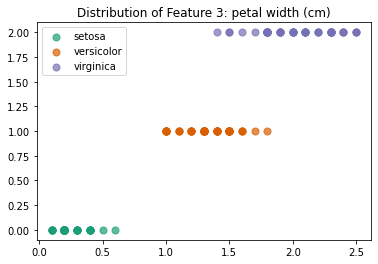

In [12]:
COLORS = ["#1B9E77", "#D95F02", "#7570B3"]
feature_id = 3
fig, ax = plt.subplots()
for label, color in zip(Y_label_id, COLORS): # 按label可视化
    idx = np.where(Y_label==label)
    ax.scatter(X_featues[idx, feature_id].squeeze(),Y_label[idx],label=Y_label_name[label], color=color,s =50, alpha=0.7)
ax.legend()
ax.set_title("Distribution of Feature {}: {}".format(feature_id, X_feature_name[feature_id]))
plt.show()

##### Feature distribution: feature combination of two dimension 
(0,1),(0,2),(0,3)
(1,2),(1,3)
(2,3)

In [17]:
all_combinations = []
for i in range(X_featues.shape[1]):
    for j in range(i+1, X_featues.shape[1]):
        all_combinations.append((i,j))

In [18]:
all_combinations

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

In [19]:
n_row = 3
n_col = 2
all_subplot_idx = []
for i in range(n_row):
    for j in range( n_col):
        all_subplot_idx.append((i,j))
print("n_row: {},n_col: {}".format(n_row, n_col))
print(all_subplot_idx)


n_row: 3,n_col: 2
[(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)]


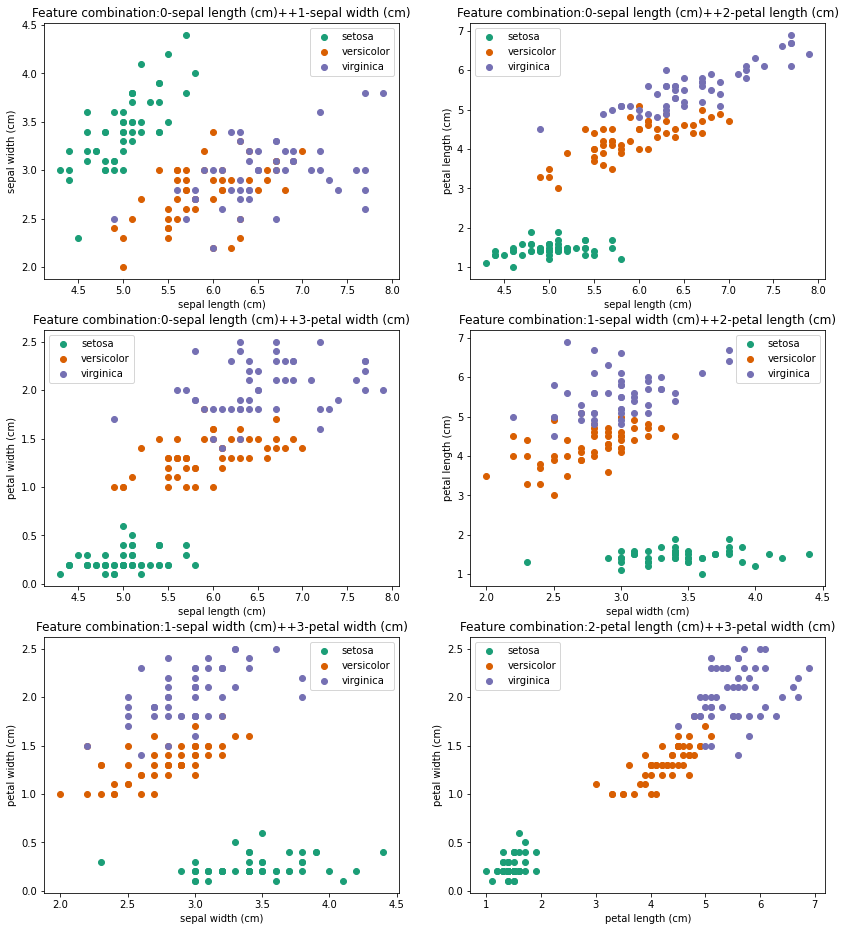

In [20]:
all_subplot_idx_iter = iter(all_subplot_idx)
fig_width = 14
fig_height = 16
fig2, axs2 = plt.subplots(n_row,n_col,figsize=(fig_width,fig_height))

for com in all_combinations: # enumerate all the features combinations
    feature_id1 = com[0]
    idx = next(all_subplot_idx_iter)
    ind_r = idx[0]
    ind_c = idx[1]
    for label, color in zip(Y_label_id, COLORS): # color different label
        idx = np.where(Y_label==label)
        axs2[ind_r][ind_c].scatter(X_featues[idx, com[0]].squeeze(),X_featues[idx, com[1]].squeeze(),label=Y_label_name[label],color=color)
    axs2[ind_r][ind_c].set_xlabel(X_feature_name[com[0]])
    axs2[ind_r][ind_c].set_ylabel(X_feature_name[com[1]])
    axs2[ind_r][ind_c].legend()
    axs2[ind_r][ind_c].set_title("Feature combination:{}-{}++{}-{}".format(com[0], X_feature_name[com[0]], com[1], X_feature_name[com[1]]))
plt.savefig('vis_feature_2.png')
plt.show()

#### Feature distribution: feature combination of three dimension 



In [21]:
all_combinations = []
for i in range(X_featues.shape[1]):
    for j in range(i+1, X_featues.shape[1]):
        for z in range(j+1, X_featues.shape[1]):
            all_combinations.append((i,j,z))
all_combinations

[(0, 1, 2), (0, 1, 3), (0, 2, 3), (1, 2, 3)]

In [22]:
n_row = 2
n_col = 2
all_subplot_idx = []
for i in range(n_row):
    for j in range( n_col):
        all_subplot_idx.append((i,j))
print("n_row: {},n_col: {}".format(n_row, n_col))
print(all_subplot_idx)



n_row: 2,n_col: 2
[(0, 0), (0, 1), (1, 0), (1, 1)]


In [23]:
import matplotlib
print(matplotlib.__version__)


3.5.2


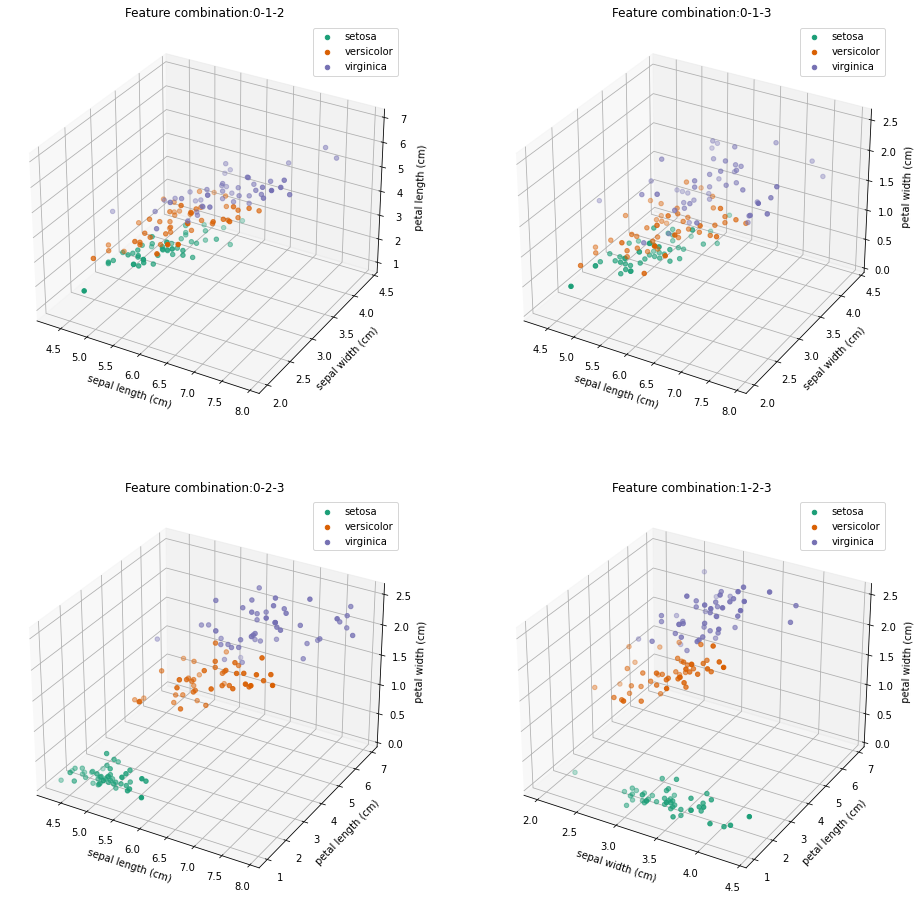

In [24]:
# from importlib_metadata
all_subplot_idx_iter = iter(all_subplot_idx)
fig_width = 16
fig_height = 16
# fig3, axs3 = plt.subplots(n_row,n_col,figsize=(fig_width,fig_height),projection='3d')
# fig3 = plt.figure(figsize=plt.figaspect(0.5))
fig3 = plt.figure(figsize=(fig_width,fig_height))


for index, com in enumerate(all_combinations): # enumerate all the features combinations
    idx = next(all_subplot_idx_iter)
    ax = fig3.add_subplot(n_row, n_col, index+1, projection='3d')
#     fig3, ax = plt.subplots(n_row, n_col,figsize=(fig_width,fig_height))
#     ax = fig3.axes(projection='3d')
    for label, color in zip(Y_label_id, COLORS): # color different label
        idx = np.where(Y_label==label)
        ax.scatter(X_featues[idx, com[0]].squeeze(),X_featues[idx, com[1]].squeeze(),X_featues[idx, com[2]].squeeze(),label=Y_label_name[label],color=color)
    ax.set_xlabel(X_feature_name[com[0]])
    ax.set_ylabel(X_feature_name[com[1]])
    ax.set_zlabel(X_feature_name[com[2]])


    ax.legend()
    ax.set_title("Feature combination:{}-{}-{}".format(com[0], com[1],com[2]))
plt.savefig('vis_feature_3.png')
plt.show()

#### Step 3: Data Preprocessing

In [25]:
from sklearn.preprocessing import normalize

In [26]:
X_featues

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [27]:
X_features_norm = normalize(X_featues, axis=0) # column normailzation

#### Step 4: Clustering using K-means algorithms
Make sure the label predicted by clustering is aligned to the original .

##### Using the Algorithms implemented by sklearn library

In [28]:
from sklearn.cluster import KMeans

In [29]:
km_alg = KMeans(init='k-means++', n_clusters=3)

In [30]:
cls = km_alg.fit_predict(X_features_norm)

In [31]:
km_alg.cluster_centers_

array([[0.09186403, 0.07976247, 0.10953613, 0.1182593 ],
       [0.06926207, 0.09063836, 0.02876799, 0.01414798],
       [0.08181754, 0.07240656, 0.08453606, 0.07620356]])

In [33]:
Y_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

##### Implementing K-Means yourself

In [47]:
# import random
# Navie Version
def kmeans(X, k=3, measure='euc', eps=0.0001, max_iter=5000):
    """
     1. initialize centroid point randomly
     2. assign each data point to its closest cluster
     3. update the centroid of clusters
     4. repeat steps 2 and 3 until k centroids are converged to certain extent
     5. output the labels
     
     returns: 
       labels: 
       centroids: 
    """
    ## Init 
    assert k > 1
    if measure == 'euc':
        measure_function = euclidean_distance
    else:
        measure_function = measure # measure should be a callback function
    n_points = X.shape[0]
    n_features = X.shape[1]
    labels = np.full(n_points, -1)
#     centroids = np.zeros((k, n_features))
    # 1. 
    init_idx = np.random.randint(0,n_points,k)
    centroids = X[init_idx] #(k, n_features)
    centroids_to_cls_idx = {} #neccessary?
    for i in range(k):
        labels[init_idx[i]]=i  
        centroids_to_cls_idx[i]=i  #unhashable type: 'numpy.ndarray'
    
    
    iter_count = 0
    eps = np.array(eps)
    eps_stop_indicator = np.finfo(eps.dtype).max
    while iter_count<max_iter and eps_stop_indicator > eps:
        # 2. assign all the samples to the closest centroid.
        for i in range(n_points):
            min_dis = np.finfo(eps.dtype).max
            for ic, centroid in enumerate(centroids[:, :]):
                tmp_dis = measure_function(X[i, :], centroid)
                if tmp_dis < min_dis:
                    min_dis = tmp_dis
                    labels[i] = centroids_to_cls_idx[ic] 
                else: # what if tmp_dis == min_dis
                    continue
        # 3.  a. locate samples with each label, calcuate their mean coord
        for i in range(k):
            cluster_idx_i = np.where(labels==i)
            prev_centroids = centroids.copy()
            centroids[i] = np.mean(X[cluster_idx_i], axis=0)# row mean
        # 4. determine whether stop the loop.
#         eps_stop_indicator = np.sum(np.abs(prev_centroids-centroids))
        eps_stop_indicator = np.sqrt(np.sum((prev_centroids-centroids)**2))
        iter_count += 1
    
    
    print("iter count: {}, eps_stop_indicator: {}".format(iter_count,eps_stop_indicator))
    return labels, centroids 

def euclidean_distance(X1, X2):
    X1 =np.array(X1)
    X2= np.array(X2)
    return np.sqrt(np.sum((X1-X2)**2))

In [52]:
result,centroids = kmeans(X_features_norm, 3, measure=euclidean_distance) 

iter count: 6, eps_stop_indicator: 0.0


In [53]:
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [38]:
result,centroids = kmeans(X_features_norm, 3) 

iter count: 8, eps_stop_indicator: 0.0


In [39]:
result # 效率原因，没有收敛到更优的解,可以调整参数或者重复实验（初始化不同会对结果有影响）

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [40]:
centroids

array([[0.06926207, 0.09063836, 0.02876799, 0.01414798],
       [0.08181754, 0.07240656, 0.08453606, 0.07620356],
       [0.09186403, 0.07976247, 0.10953613, 0.1182593 ]])

In [41]:
Y_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

##### Kmeans optimization （TODO）
time complexity: kd-tree, k-means++


#### Step 5: Evaluating Clustering Results
Visualization of CLustering result
Quantify the clustering quality.

In [59]:
all_combinations = []
for i in range(X_featues.shape[1]):
    for j in range(i+1, X_featues.shape[1]):
        all_combinations.append((i,j))

In [60]:
n_row = 3
n_col = 2
all_subplot_idx = []
for i in range(n_row):
    for j in range( n_col):
        all_subplot_idx.append((i,j))
print("n_row: {},n_col: {}".format(n_row, n_col))
print(all_subplot_idx)



n_row: 3,n_col: 2
[(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)]


In [57]:
T_cluster = np.array(['Cluster1', 'Cluster2', 'Cluster3'])

In [63]:
COLORS = ['#1B9E77', '#7570B3', '#D95F02']

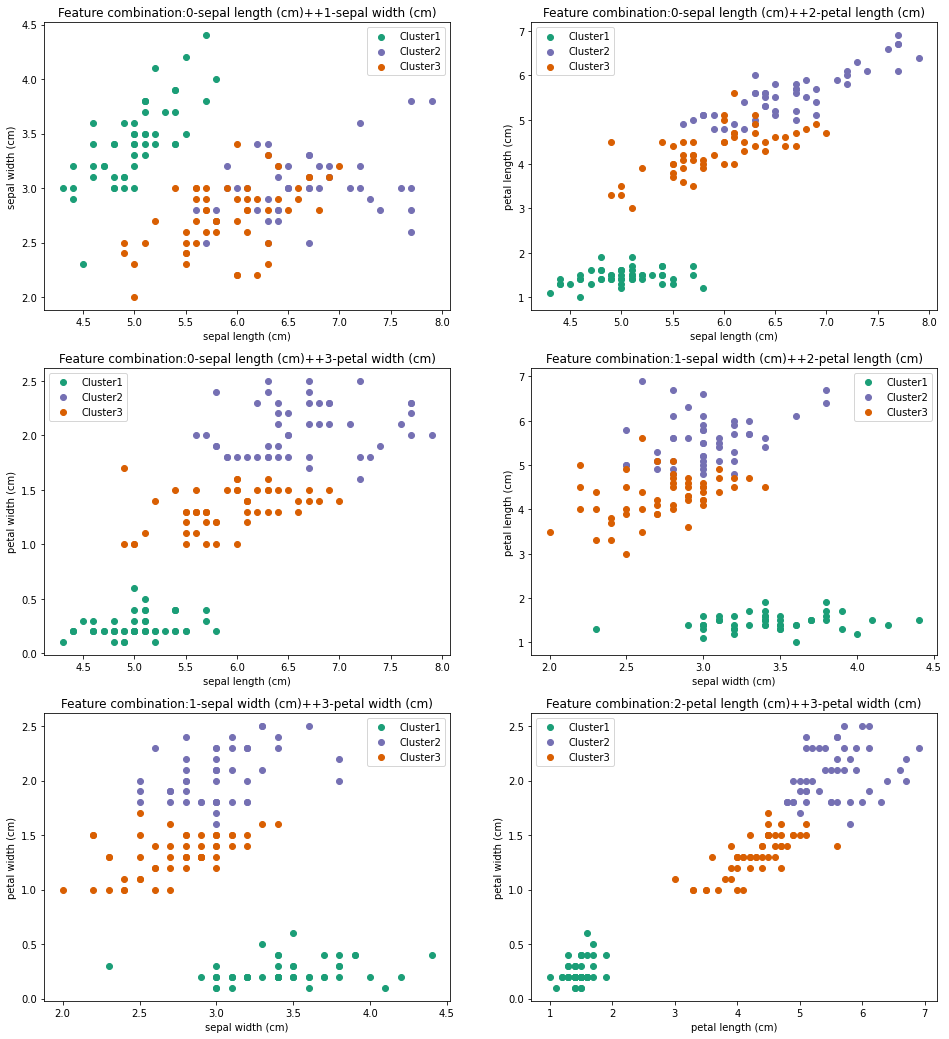

In [65]:

all_subplot_idx_iter = iter(all_subplot_idx)
fig_width = 16
fig_height = 18
fig2, axs2 = plt.subplots(n_row,n_col,figsize=(fig_width,fig_height))

for com in all_combinations: # enumerate all the features combinations
    feature_id1 = com[0]
    idx = next(all_subplot_idx_iter)
    ind_r = idx[0]
    ind_c = idx[1]
    for label, color in zip(Y_label_id, COLORS): # color different label
        idx = np.where(result==label)
        axs2[ind_r][ind_c].scatter(X_featues[idx, com[0]].squeeze(),X_featues[idx, com[1]].squeeze(),label=T_cluster[label],color=color)
    axs2[ind_r][ind_c].set_xlabel(X_feature_name[com[0]])
    axs2[ind_r][ind_c].set_ylabel(X_feature_name[com[1]])
    axs2[ind_r][ind_c].legend()
    axs2[ind_r][ind_c].set_title("Feature combination:{}-{}++{}-{}".format(com[0], X_feature_name[com[0]], com[1], X_feature_name[com[1]]))
plt.savefig('result/vis_clustering_result.png')
plt.show()

##### Using confusing matrix to evaluate the clustering result

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_label, result)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  4, 46]])